### Table of contents


### 01. Import Data and Libraries

### 02. Key questions

#### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

#### 2.The sales team also wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

#### 3.Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

#### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

#### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

#### 6. Are there differences in ordering habits based on a customer’s loyalty status?

#### 7. Are there differences in ordering habits based on a customer’s region?

#### 8.  Is there a connection between age and family status in terms of ordering habits?

#### 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

#### 10. What differences can you find in ordering habits of different customer profiles?Consider the price of orders, the frequency of orders, the products customers areordering, and anything else you can think of.

### 01. Import Data and Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [5]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_regions_final.pkl'))

In [6]:
#Checking the output
ords_prods.shape

(32404859, 35)

In [7]:
pd.options.display.max_columns = None

In [8]:
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South


### 02. Key questions

#### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [9]:
#Creating crosstab order_dow and flag 'busiest day'
crosstab_dow = pd.crosstab(ords_prods['order_day_of_week'], ords_prods['busiest days'], dropna = False )

In [10]:
#Checking the output
crosstab_dow

busiest days,Busiest day,Least busy,Regularly busy
order_day_of_week,,,
0,6204182,0,0
1,5660230,0,0
2,0,0,4213830
3,0,3840534,0
4,0,3783802,0
5,0,0,4205791
6,0,0,4496490


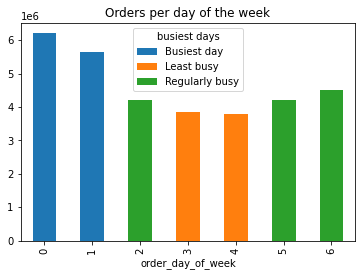

In [11]:
# Visualization
crosstab_ddow = crosstab_dow.plot(kind = 'bar', stacked = True, title = 'Orders per day of the week')

In [12]:
# Exporting visualization
crosstab_ddow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dow_busiest_days.png'))

#### 2.The sales team also wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [11]:
#creating random samples with 70/30 split
#the seed represents a random but reproducable pattern
#dev stores boolean values for if value in array is less than or greater than 0.7
#random created random numbers and rand ensures uniform distribution is followed
np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [12]:
# Sampling: store 70% of the sample in the dataframe big and 30% in the dataframe small
big = ords_prods[dev]
small = ords_prods[~dev]

In [13]:
# Checking the output
big.shape

(22683761, 35)

In [14]:
small.shape

(9721098, 35)

In [15]:
#reducing dataframe into only necessary columns for faster processing
hrs_prices = small[['order_time_of_day','prices']]

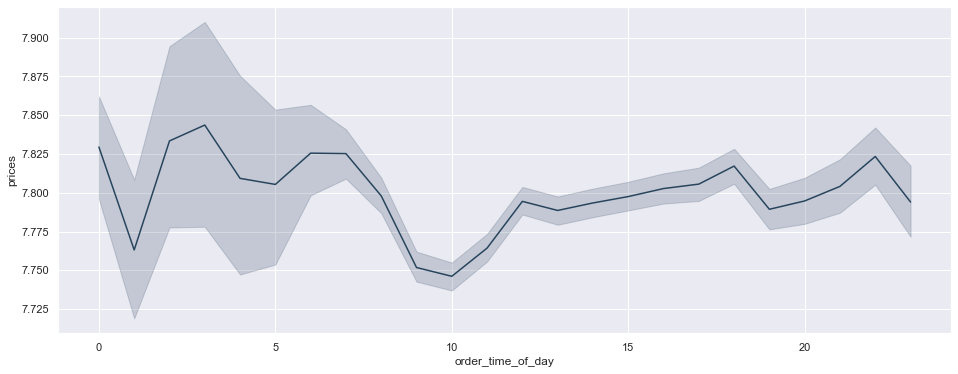

In [17]:
#creating line chart from small hrs_prices dataframe
#setting chart size
sns.set(rc = {'figure.figsize':(16,6)})
line_hrs_prices= sns.lineplot(data = hrs_prices, x = 'order_time_of_day',y = 'prices', color = '#27445C')

In [18]:
#exporting hourly prices line chart
line_hrs_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_prices.png'))

In [13]:
# Creating a crosstab
crosstab_day_spending = pd.crosstab(ords_prods['order_day_of_week'], ords_prods['spender_flag'], dropna = False )

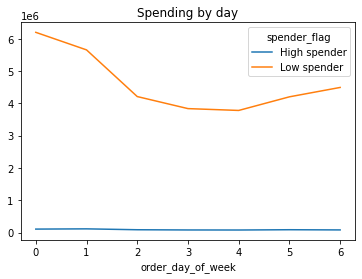

In [14]:
#Visualization spending by day
crosstab_day_spending = crosstab_day_spending.plot(kind = 'line', stacked = True, title = 'Spending by day')

In [15]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_day_spending.png'))

#### 3.Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [16]:
#price range value counts
ords_prods['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

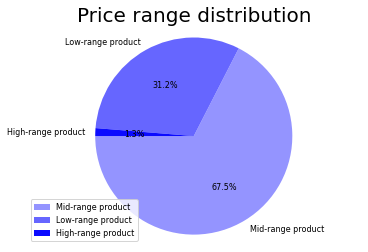

In [41]:
#pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = ords_prods['price_range_loc'].value_counts()
colors = ['#9494FF','#6666FF','#0B0BFF']
textprops = {"fontsize":8}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', startangle=180, textprops=textprops)
ax.axis('equal')
ax.set_title('Price range distribution', fontsize=20)

plt.legend(loc="lower left", fontsize=8)
plt.show()

In [42]:
#exporting price range pie chart
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_pie.png'))

#### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [44]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [45]:
#creating data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [46]:
# mapping  department names to department id in dataframe
ords_prods['department'] = ords_prods['department_id'].map(data_dict)
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,beverages


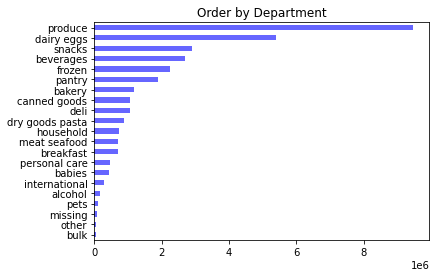

In [51]:
# bar chart showing the orders made for each department
order_by_department = ords_prods['department'].value_counts().sort_values().plot.barh(color = '#6666FF', title = 'Order by Department')

In [52]:
#Exporting the visualization
order_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_by_department.png'))

#### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [76]:
# loyalty flag value counts
ords_prods['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

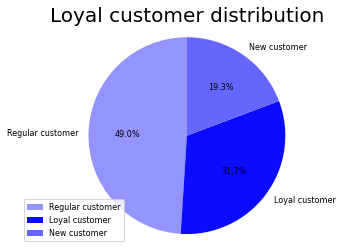

In [87]:
#pie chart for loyalty_flag
labels = 'Regular customer', 'Loyal customer', 'New customer'
sizes = ords_prods['loyalty_flag'].value_counts()
colors = ['#9494FF','#0B0BFF','#6666FF']
textprops = {"fontsize":8}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops=textprops)
ax.axis('equal')
ax.set_title('Loyal customer distribution', fontsize=20)

plt.legend(loc="lower left", fontsize=8)
plt.show()

In [92]:
#exporting loyal customer pie chart
loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_pie.png'))

In [103]:
# creating crosstab to display day_since_prior_order and loyal customers
crosstab_return_customer = pd.crosstab(ords_prods['days_since_prior_order'], ords_prods['loyalty_flag'], dropna = False )

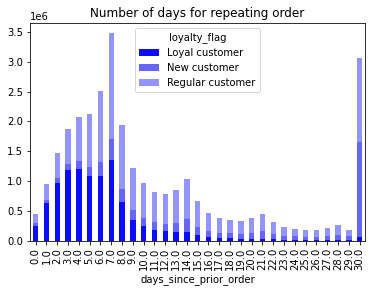

In [104]:
crosstab_return_customer = crosstab_return_customer.plot(kind = 'bar', stacked = True, title = 'Number of days for repeating order', color = ['#0B0BFF','#6666FF','#9494FF'])

In [105]:
#exporting the bar chart
crosstab_return_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'repeating_order.png'))

#### 6. Are there differences in ordering habits based on a customer’s loyalty status?

In [110]:
crosstab_loy_spend = pd.crosstab(ords_prods['loyalty_flag'], ords_prods['spender_flag'], dropna = False )

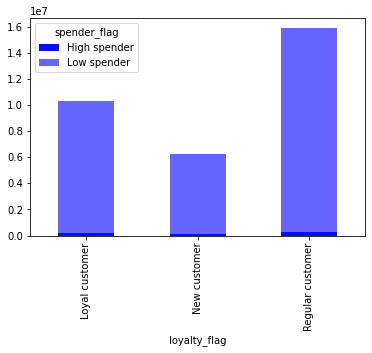

In [111]:
crosstab_loy_spend = crosstab_loy_spend.plot(kind = 'bar', stacked = True, color = ['#0B0BFF','#6666FF'])

In [112]:
#exporting the bar chart
crosstab_loy_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_spend.png'))

#### 7. Are there differences in ordering habits based on a customer’s region?

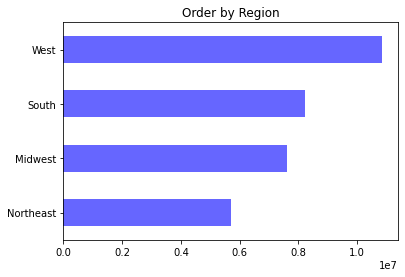

In [113]:
order_by_region = ords_prods['region'].value_counts().sort_values().plot.barh(color = '#6666FF', title = 'Order by Region')

In [114]:
#exporting the bar chart
order_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order.png'))

In [115]:
#creating crosstab spender_flag and region
crosstab_reg_spend = pd.crosstab(ords_prods['region'], ords_prods['spender_flag'], dropna = False )

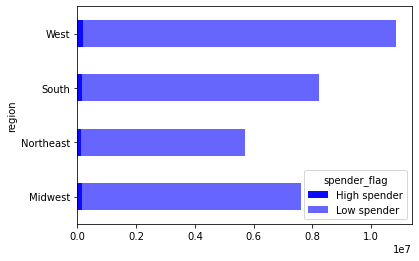

In [116]:
crosstab_reg_spend = crosstab_reg_spend.plot(kind = 'barh', stacked = True, color = ['#0B0BFF','#6666FF'])

In [126]:
#creating crosstab frequency flag and region
crosstab_freq_spend = pd.crosstab(ords_prods['region'], ords_prods['order_frequency_flag'], dropna = False )

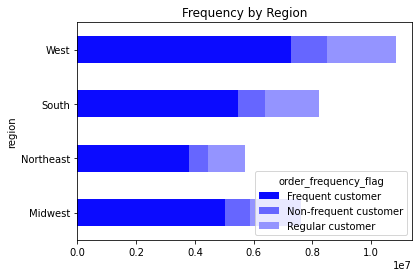

In [127]:
crosstab_freq_spend = crosstab_freq_spend.plot(kind = 'barh', stacked = True, color = ['#0B0BFF','#6666FF','#9494FF'], title = 'Frequency by Region')

In [128]:
#exporting the bar charts
crosstab_reg_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spender.png'))
crosstab_freq_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frequency.png'))

#### 8.  Is there a connection between age and family status in terms of ordering habits?

In [139]:
#creating crosstab spender flag and age group
crosstab_age_spend = pd.crosstab(ords_prods['age_group'], ords_prods['spender_flag'], dropna = False )

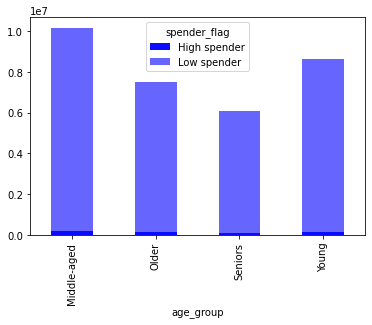

In [140]:
crosstab_age_spend = crosstab_age_spend.plot(kind = 'bar', stacked = True, color = ['#0B0BFF','#6666FF'])

In [141]:
#creating crosstab income level and marital status
crosstab_mar_income = pd.crosstab(ords_prods['marital_status'], ords_prods['income_level'], dropna = False )

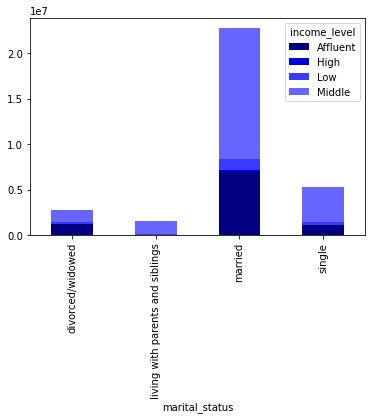

In [142]:
crosstab_mar_income = crosstab_mar_income.plot(kind = 'bar', stacked = True, color = ['#000080', '#0000DC', '#3939FF','#6666FF'])

In [143]:
#exporting the bar charts
crosstab_age_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spender.png'))
crosstab_mar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marrital_income.png'))

#### 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

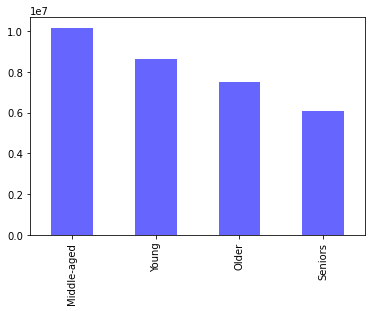

In [144]:
#creating bar chart for orders made by age group
age_bar=ords_prods['age_group'].value_counts().plot.bar(color='#6666FF',fontsize=10)

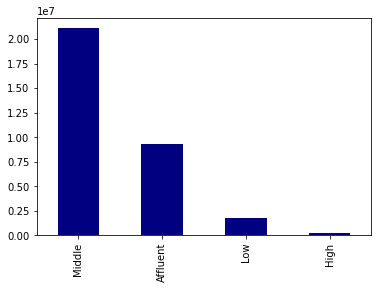

In [145]:
#creating bar chart for orders made by income level
income_bar=ords_prods['income_level'].value_counts().plot.bar(color='#000080',fontsize=10)

In [146]:
#creating crosstab income level and age group
crosstab_age_income = pd.crosstab(ords_prods['age_group'], ords_prods['income_level'], dropna = False )

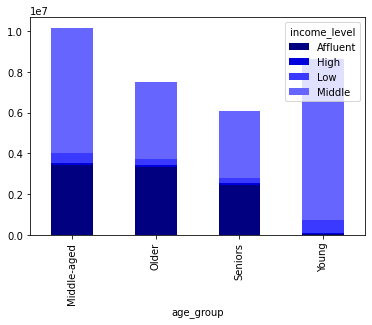

In [147]:
crosstab_age_income = crosstab_age_income.plot(kind = 'bar', stacked = True, color = ['#000080', '#0000DC', '#3939FF','#6666FF'])

In [148]:
#creating crosstab income level and profile
crosstab_profile_income = pd.crosstab(ords_prods['profile'], ords_prods['income_level'], dropna = False )

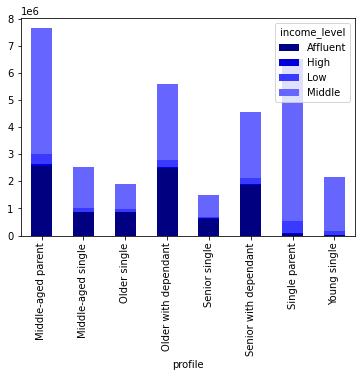

In [149]:
crosstab_profile_income = crosstab_profile_income.plot(kind = 'bar', stacked = True, color = ['#000080', '#0000DC', '#3939FF','#6666FF'])

In [150]:
#exporting the bar charts
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))
crosstab_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))
crosstab_profile_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile.png'))

#### 10. What differences can you find in ordering habits of different customer profiles?Consider the price of orders, the frequency of orders, the products customers areordering, and anything else you can think of.

In [152]:
#creating crosstab income level and department
crosstab_dep_income = pd.crosstab(ords_prods['department'], ords_prods['income_level'], dropna = False )

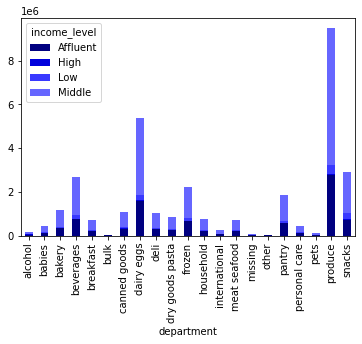

In [153]:
crosstab_dep_income = crosstab_dep_income.plot(kind = 'bar', stacked = True, color = ['#000080', '#0000DC', '#3939FF','#6666FF'])

In [154]:
#exporting the bar chart
crosstab_dep_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department.png'))